# เวกเตอร์เชิงพื้นที่ในไพธอน

โค้ดนำมาจาก http://patrickgray.me/open-geo-tutorial/chapter_4_vector.html

นิสิตจะได้ทำความคุ้นเคยกับไลบราลี่ทางด้านภูมิสารสนเทศในภาษาไพธอนที่จัดการข้อมูลเวกเตอร์ดังต่อไปนี้ฃ
* shapely https://shapely.readthedocs.io/en/stable/manual.html ใช้ในการทำการวิเคราะห์เชิงพื้นที่ในไพธอน เช่น buffers, unions, intersections, centroids, convex hulls, และอื่นๆ เป็นแพคเกจที่จัดการและวิเคราะห์ข้อมูลวัตถุเชิงเรขาคณิต (geometric objects) พัฒนามาจาก GEOS https://libgeos.org/  (ตัวนี้ GDAL/OGR นำไปใช้พัฒนาของเขาด้วย) ซึ่งเป็นไลบราลี่หลักเบื้องหลังของไลบราลี่ PostGIS และ JTS  
 
* Fiona https://fiona.readthedocs.io/en/latest/README.html เป็นไลบราลี่ที่ใช้ในการจัดการอ่านและเขียนข้อมูลทางภูมิสารสนเทศในไพธอน พัฒนามาจาก OGR ใช้ร่วมกับแพคเกจไพธอนอื่นๆ ได้ด้วยเช่น pyproj, Rtree, และ Shapely

* Descartes https://pypi.org/project/descartes/ เป็นไลบราลี่ไพธอนในการพลอตข้อมูลเชิงเรขาคณิตที่ใช้ร่วมกันกับ matplotlib 

* Geopandas https://geopandas.org/en/stable/about.html  เป็นการต่อยอดไลบราลี่ pandas ที่นำมาพัฒนาต่อเพื่อใช้งานทางด้านภูมิสารสนเทศ สามารถนำมาใช้งานใน spatial operations ด้วยความสามารถของ Shapely  และการอ่านไฟล์หรือเขียนไฟล์ก็ใช้ความสามารถของ Fiona ส่วนการพลอตข้อมูลแผนที่ใช้ความสามารถของ Descartesและ matplotlib นอกจากนั้น Geopandas ยังสามารถใช้งานร่วมกันกับ spatial database เช่น PostGIS ได้อีกด้วย

* Folium https://github.com/python-visualization/folium เป็นไลบราลี่ทางด้านไพธอนที่ใช้ในการแสดงผลข้อมูลภูมิสารสนเทศแบบ interactive ด้วยการใช้ความสามารถของ leaflet map 

แนะนำองค์ความรู้และหน่วยงาน
*  1. คนที่พัฒนา GDAL/OGR หลัก https://gdal.org/  คือ Frank Warmerdam ที่เป็นประโยชน์มากต่องานทางด้านภูมิสารสนเทศ ใช้ในการจัดการข้อมูลทั้งราสเตอร์และเวกเตอร์ โดยเป็นไลบราลี่หลักที่สำคัญของซอฟท์แวร์ทางด้านภูมิสารสนเทศ มี Github https://github.com/warmerdam?tab=repositories 
แล้วยังมีติวเตอร์เรียลทาง้ดาน GIS/ WebGIS/ Spatial database https://www.bostongis.com/?content_name=fwarmerdam ในตอนแรก GDAL/OGR พัฒนาโดยภาษา C++ แต่ปัจจุบันสามารถนำมาใช้ในภาษาไพธอนได้แล้ว https://gdal.org/api/python.html ซึ่งเป็นประโยชน์อย่างมากต่อผู้ใช้งานในการพัฒนาซอฟท์แวร์และการวิจัย

*  2. หน่วยงาน Open Geospatial Consortium หรือ OGC https://en.wikipedia.org/wiki/Open_Geospatial_Consortium อ่าน https://www.ogc.org/about เป็นองค์กรอาสาสมัครระดับนานาชาติ ที่ทำหน้าที่วางรากฐานมาตรฐานข้อมูลทางด้านภูมิสารสนเทศ ร่วมไปถึง services, sensor web and Internet of Things, GIS data processing และ data sharing  อ่านมาตรฐานของ OGC https://www.ogc.org/docs/is สามารถติดตามเวปบินาร์ของ OGC ได้จาก https://www.ogc.org/webinars เพื่ออัพเดทติดตามความรู้ด้านนี้
    
*  3.หน่วยงาน Open Source Geospatial Foundation  หรือ OSGeo https://www.osgeo.org/about/ เป็นหน่วยงานที่ไม่หวังผลกำไร คอยสนับสนุนช่วยเหลือ ดูแล พัฒนาองค์ความรู้ เทคโนโลยีทางภูมิสารสนเทศ ด้วยการอุทิศตนให้กับคำว่า an open philosophy and participatory community driven development โดยมีโครงการหรือแคมเปญที่สำคัญที่คอยพัฒนานักภูมิสารสนเทศ ที่เป็นที่รู้จักคือ การประชุมที่ชื่อ “Free and Open Source Software for Geospatial” หรือ FOSS4G https://www.osgeo.org/initiatives/foss4g/ ซึ่งจะมีการจัดเป็นประจำทุกปี แต่เนื่องจากสถานการณ์โควิดเลยต้องมีการระงับมาตั้งแต่ปี 2020 ภายในงานประชุมจะมีเวิร์คชอปต่างๆ การเสวนา การปาฐกถา ที่แสดงถึงความก้าวหน้าทางด้านภูมิสารสนเทศมากมาย ให้ผู้เข้าร่วมงานได้คอยอัพเดทแทบทุกปี เป็นการแลกเปลี่ยนองค์ความรู้เพื่อนำมาต่อยอด อย่างไรก็ตาม 

*  4. หน่วยงาน OSGeo-TH ที่รวมตัวโดยผู้ใช้และผู้พัฒนาซอฟท์แวร์ฟรีและรหัสเปิด Free and Open source software ในประเทศไทย   https://osgeo.in.th/home/main บทบาทหน้าที่ได้มีการจำลองมาจาก OSGeo ในระดับโลก หากแต่ต้องการที่จะทำให้เป็นภาษาไทย ให้คนไทยได้ใช้ประโยชน์ อ่าน https://wiki.osgeo.org/wiki/Thai โดยกลุ่มผู้ก่อตั้งและสมาชิกเริ่มแรกมาจากหน่วยงานทั้งภาคการศึกษา บริษัทเอกชน เป็นต้น โดยมีคณาจารย์ในหลักสูตร ปริญญาโท ภูมิสารสนเทศศาสตร์ ม.นเรศวร เข้าร่วมทำกิจกรรมเหล่านี้ด้วย ด้วยการจัดงานประชุมที่ชื่อ Foss4g in Thailand  ขึ้น 2 ครั้งได้แก่ 2018 และ 2019 https://2019.foss4g.in.th/about/ แต่เนื่องจากสถานการณ์โควิด-19 ทำให้การประชุมจึงยังไม่ได้มีการดำเนินต่อในปีถัดๆ มา 

สิ่งที่นิสิตต้องมีพื้นฐานก่อนมาเรียนแบบเรียนนี้
* 1. ความรู้ทางด้านแผนที่ และ GIS สามารถเข้าไปทบทวนหรือเรียนรู้ได้จากลิงก์ (คำเตือนเป็นภาษาอังกฤษ แต่ดีมาก ) https://saylordotorg.github.io/text_essentials-of-geographic-information-systems/index.html 
* 2. ความรู้ทางด้านภาษาไพธอนเบื้องต้น ถึง เล็กน้อย ก็น่าจะเข้าใจได้ อาจารย์ประเสริฐ วีดีโอที่ 1-123 https://www.youtube.com/watch?v=bu6kwrpOqFM&list=PLoTScYm9O0GH4YQs9t4tf2RIYolHt_YwW&index=1 หรือ สอนยูทูปเบื้องต้นของ ผม ผศ.ดร.นัฐพล มหาวิค วีดีโอที่ 3-4 https://www.youtube.com/watch?v=JM8TtBm1yHs&list=PL2e-NEAjUyLFlRjQ5fQBrX_8M-onbMQHf&index=3 

* 3. นิสิตสามารถเรียนรู้เพิ่มเติม ด้วยการเรียน pandas จากอาจารย์ประเสริฐ เพื่อจะได้เข้าใจ geopandas ลิงก์นี้ครับ https://www.youtube.com/watch?v=W661Zy939Q0&list=PLoTScYm9O0GFVfRk_MmZt0vQXNIi36LUz&index=20

## เรียน Shapely เบื้องต้น
มาทำความเข้าใจกับหลักการเบื้องต้นของ shapefly ผ่านการเรียนรู้จากฐานองค์ความรู้ GIS

เวกเตอร์ใน GIS  https://datacarpentry.org/organization-geospatial/aio/index.html

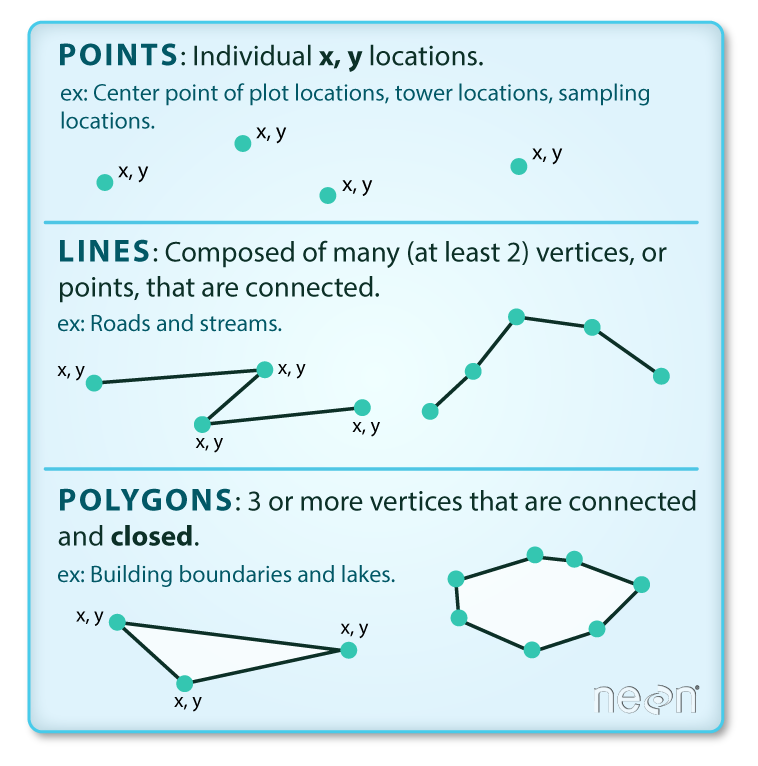

ซับซ้อนขึ้นมา https://m.blog.naver.com/jokercsi1/222381939642?view=img_1
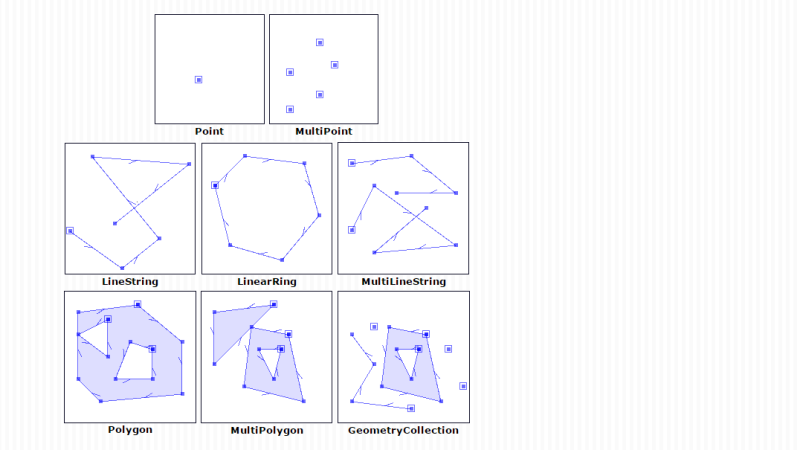

## เวกเตอร์ Overley method 
จากเวป https://saylordotorg.github.io/text_essentials-of-geographic-information-systems/s11-geospatial-analysis-i-vector-o.html

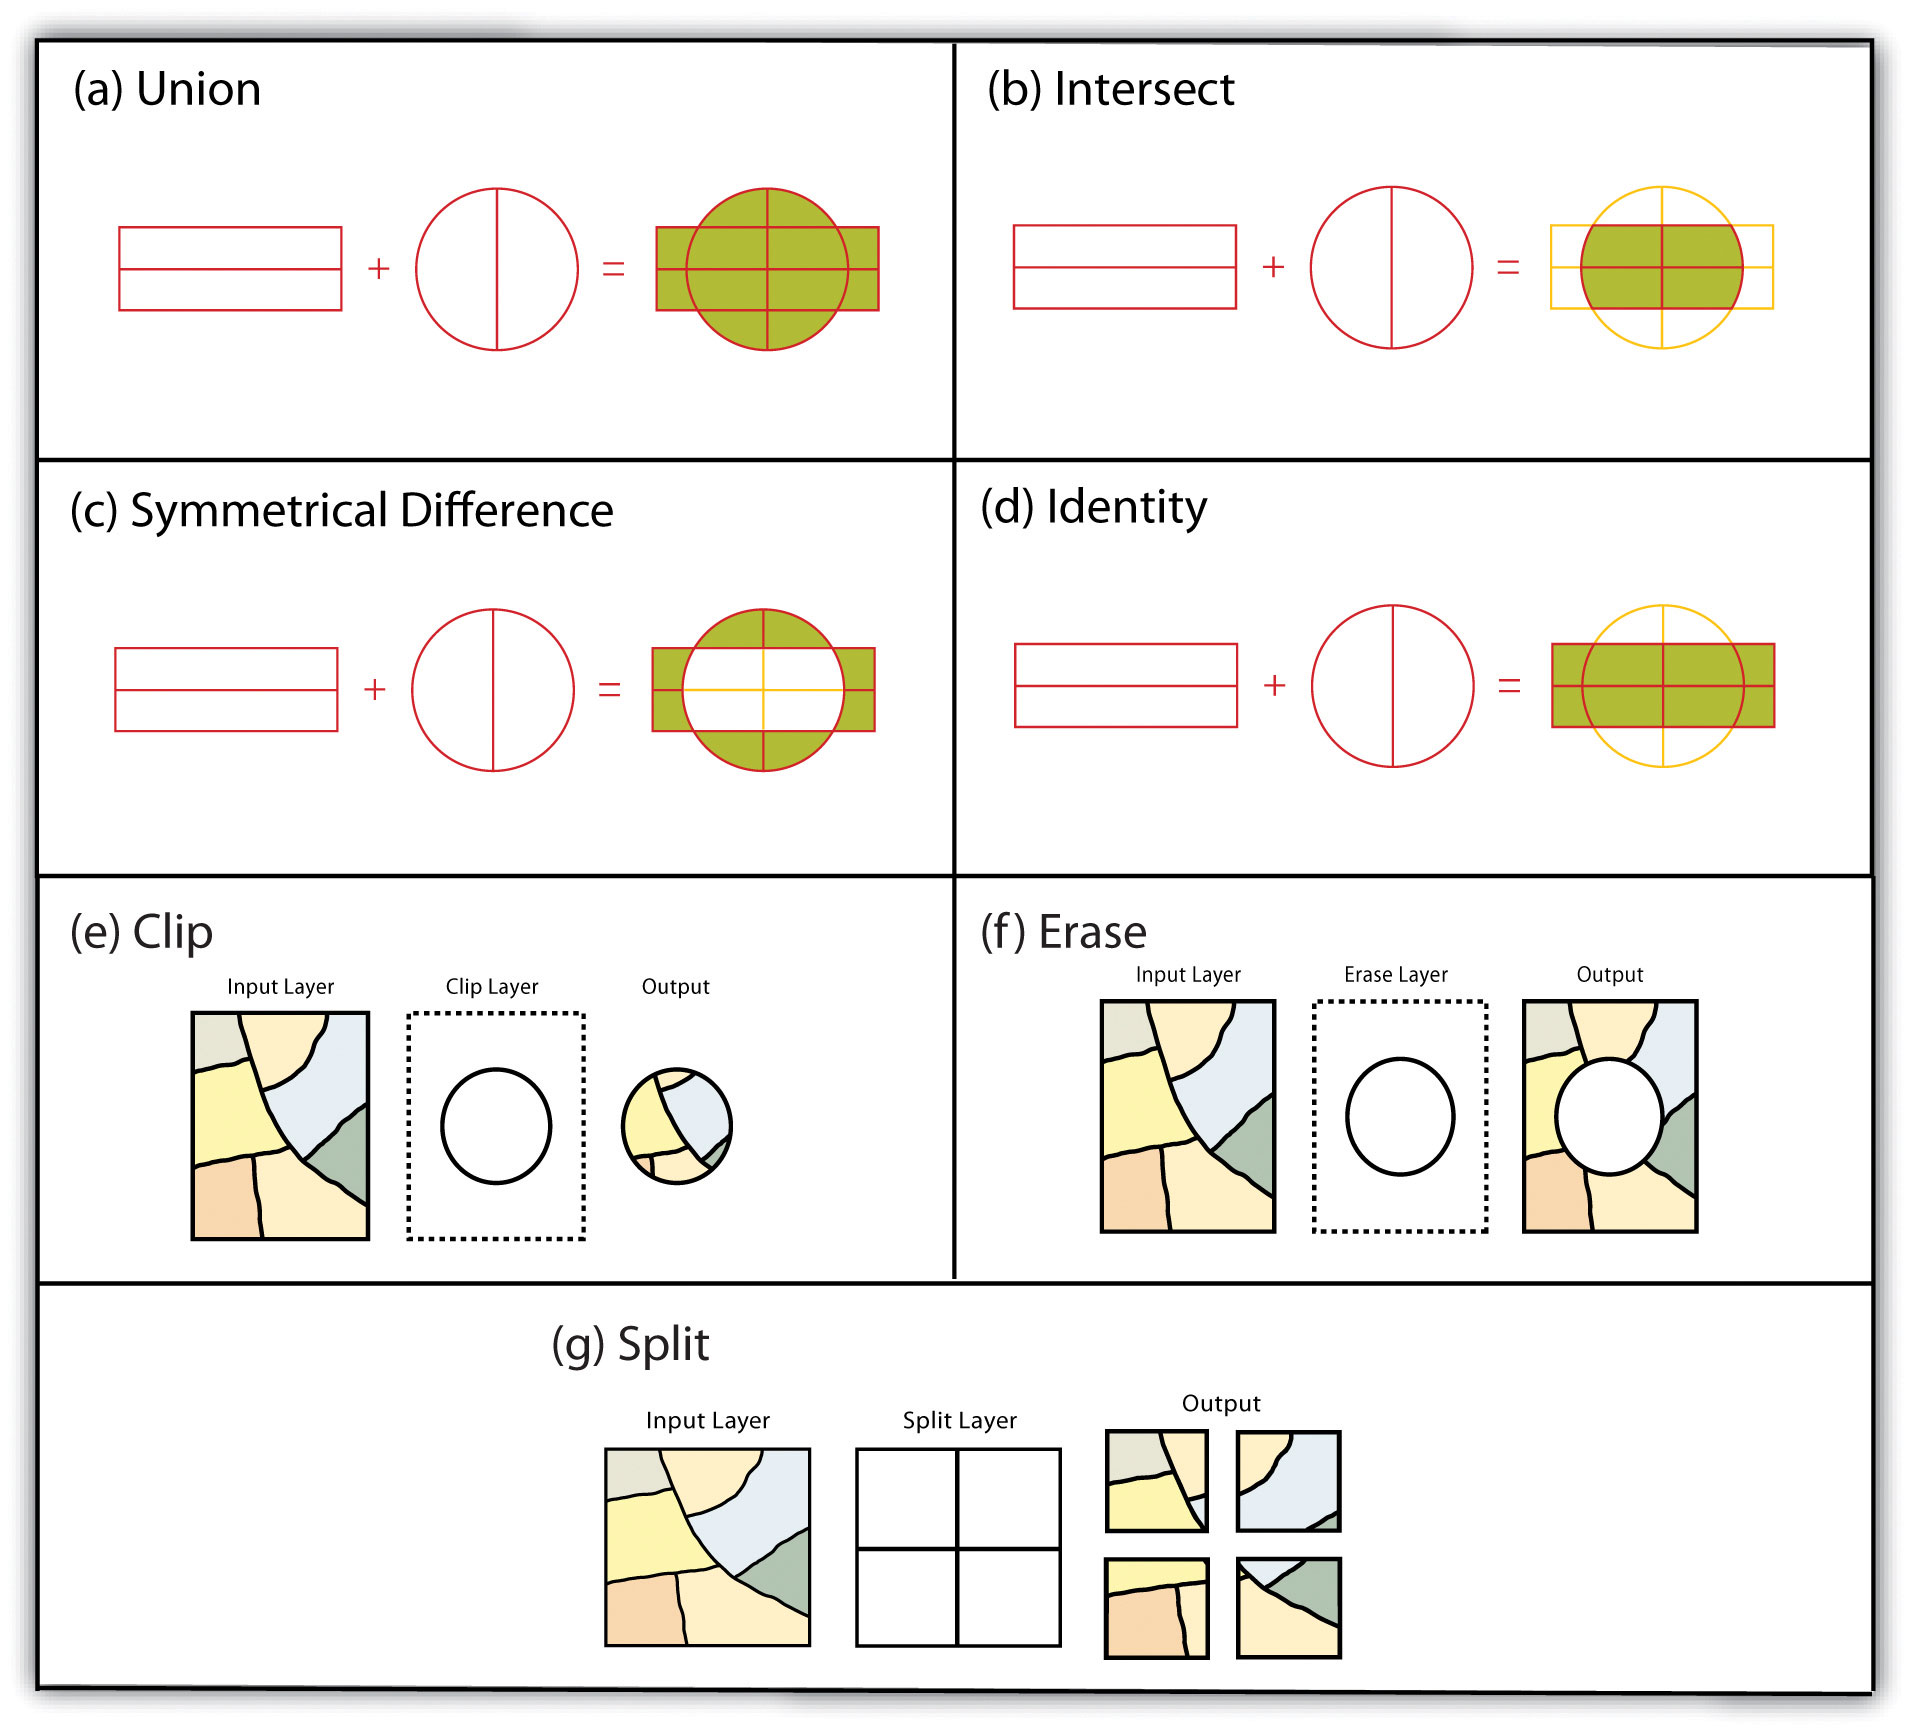

In [1]:
# นำเข้าไลบราลี่
import shapely
from shapely import geometry
from shapely.geometry import shape, Point, LineString, Polygon

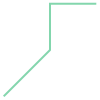

In [2]:
# สร้างข้อมูลชนิดเส้น หรือ LineString  ซึ่งจะต้องป้อนค่าพิกัด x,y ในระบบพิกัดฉาก หรือ cartesian grid
a = LineString([(0, 0), (1, 1), (1,2), (2,2)])
a

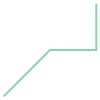

In [3]:
# สร้างอีกเส้น 
b = LineString([(0, 0), (1, 1), (2,1), (2,2)])
b

สามารถนำสองเส้นด้านบน มาทำการวิเคราะห์เชิงพื้นที่อย่างง่ายได้แล้ว ด้วยการใช้ spatial intersection

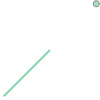

In [4]:
# หาจุดตัด หรือ ส่วนซ้อนทับกัน ระหว่างเส้น a และ b
x = b.intersection(a)
x

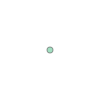

In [5]:
# ต่อไปสร้างข้อมูลจุด เพื่อทำการสร้าง buffer ออกไปจากจุด
c = Point(1, 1)
c

### การทำบัฟเฟอร์ 
จากเวป https://saylordotorg.github.io/text_essentials-of-geographic-information-systems/s11-geospatial-analysis-i-vector-o.html
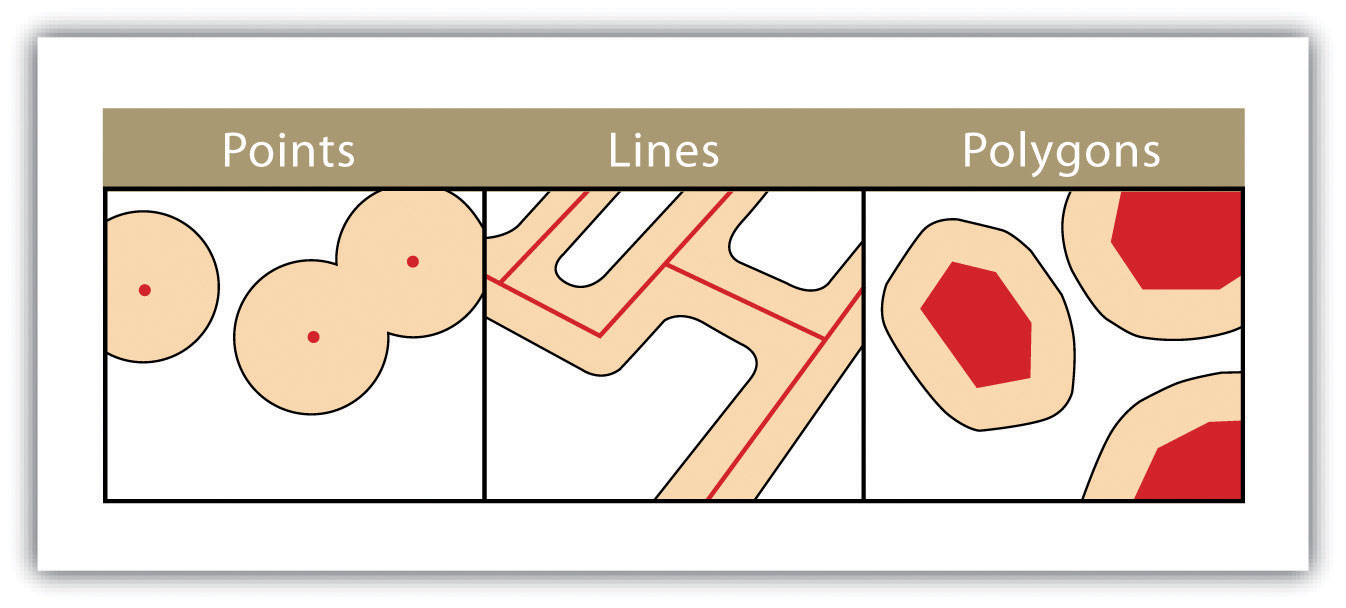 

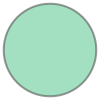

In [6]:
# สร้าง buffer จากจุด c ออกไปให้มีรัศมีเป็นระยะทาง 1.5 หน่วย
c = c.buffer(1.5)
c

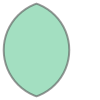

In [7]:
# ทำสร้างจุดอีก 1 จุดให้ชื่อว่า d ที่มีศูนย์กลางต่างจากจุด c พร้อมกับบัฟเฟอร์ เพื่อนำไปหาพื้นที่ซ้อนทับกันกับพื้นที่ c
d = Point(2, 1).buffer(1.5)
c.intersection(d)

หรือสามารถนำพื้นที่วงกลม c และ d มาทำการ union กัน ก็ทำได้

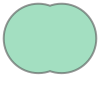

In [8]:
c.union(d)

ที่ผ่านมาเราได้ทำการพลอตด้วยการใช้การพลอตแบบตั้งต้นในของ jupyter notebook แต่ต่อไปเราจะใช้ matplotlib ในการช่วยพลอตแสดงผลการวิเคราะห์

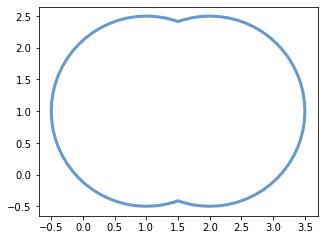

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

BLUE = '#6699cc'
GRAY = '#999999'

fig, ax = plt.subplots(figsize=(5, 5))
x, y = c.union(d).exterior.xy # หาจุด x และ y ที่อยู่ภายใน shape หลังจากการทำ union
ax.plot(x, y, color=BLUE, linewidth=3, solid_capstyle='round')
ax.set_aspect('equal') # ทำให้แกนที่สร้างมีขนาดที่เท่ากัน เพื่อไม่ให้รูปร่างของแผนที่มีการบิดเบี้ยว
plt.show()

ต่อไปจะทำการแสดงผลการวิเคราะห์ด้วยหลักการ GIS ที่ซับซ้อนขึ้นมา นั่นคือ จะทำการสร้างภาพย่อยสองภาพ หรือ subplot1 และ 2 โดยภาพแรกจะพลอตการบัฟเฟอร์ ส่วนภาพสองจะ erode buffer แล้วทำการพลอตซ้อนทับด้านบนของbuffer 

ในที่นี้จะใช้ descartes เพื่อทำการพลอตรูปปิดดังกล่าวใน matplotlib

หลักการ erode และ dilate morphology ซึ่งเป็นหลักการพื้นฐานที่นิยมใช้ในการจัดการข้อมูลภาพ

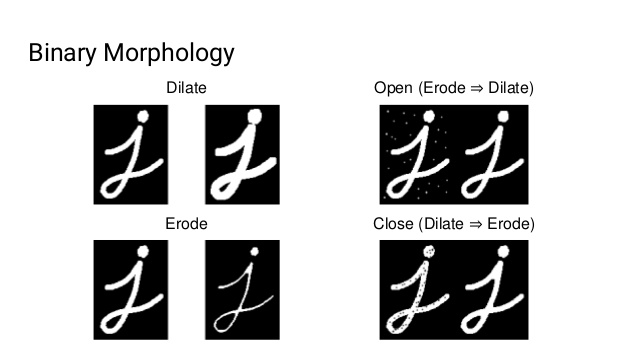

อ่านลิงก์ opencv python https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

C:\Users\Admin\anaconda3\envs\pyrsIntro\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\Admin\anaconda3\envs\pyrsIntro\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


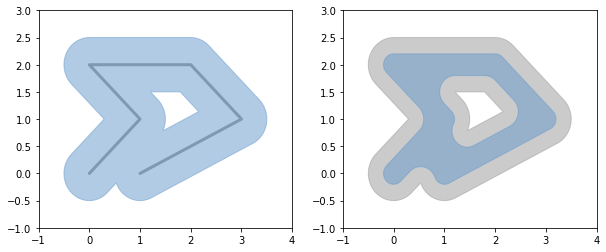

In [10]:
from descartes import PolygonPatch # ไลบราลี่นี้มีประโยชน์ต่อการพลอต shapely shapes ด้วย matplotlib

# สร้างเส้นขึ้นมาจากค่าพิกัด x,y
line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])

fig, axs = plt.subplots(1,2, figsize=(10, 4))

# ภาพ Subplot # 1
axs[0].set_xlim([-1,4])
axs[0].set_ylim([-1,3])

x, y = line.xy # เก็บค่าพิกัด x,y ของจุดพิกัดบนเส้นจากshapely object
axs[0].plot(x, y, color=GRAY, linewidth=3, solid_capstyle='round', zorder=1)

dilated = line.buffer(0.5) # สร้างบัฟเฟอร์รูปปิดจากเส้น create a dilated version of this line - note this creates a polygon
patch1 = PolygonPatch(dilated, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2) # สร้าง PolygonPatch เพื่อให้ง่ายต่อการพลอต
axs[0].add_patch(patch1) # เพิ่มรูปปิดเข้าไปในพลอต

# ภาพ Subplot # 2
axs[1].set_xlim([-1,4])
axs[1].set_ylim([-1,3])

patch2a = PolygonPatch(dilated, fc=GRAY, ec=GRAY, alpha=0.5, zorder=1)
axs[1].add_patch(patch2a)

eroded = dilated.buffer(-0.3)

# เราสามารถใช้ shapely objects ในการพลอต แต่ว่าข้อมูลในฟอร์แมท GeoJSON-like data ใช้งานได้ง่ายกว่า
polygon = eroded.__geo_interface__
patch2b = PolygonPatch(polygon, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2)
axs[1].add_patch(patch2b)

เราสามารถใช้shapely ในการทำ geometric operations เพื่อเคราะห์ด้าน GIS ได้หมด

ต่อไปจะใช้ข้อมูลESRI Shapefile ที่นักภูมิศาสตร์คุ้นเคย ในการสาธิตแบบฝึกหัด เพื่อให้เข้าใจและเกิดไอเดียต่อการนำไปใช้งานจริง

## Opening an ESRI Shapefile


fiona ไลบราลี่ใช้โค้ดเดียวกันที่มีใน OGR ดังนั้นเราจึงสามารถดึงข้อมูล properties หรือ meta ที่เก็บไว้ใน shapefile มาอ่านได้  ซึ่งก็คล้ายคลึงกับที่ไลบราลี่ rasterio ดึงคำสั่งจาก GDAL มาใช้ 

* rasterio เป็นไลบราลี่ที่พัฒนาให้ใช้ในภาษาไพธอนเพื่อจัดการข้อมูลราสเตอร์ ด้วยการดึงความสามารถ GDAL มาใช้กับข้อมูลราสเตอร์
* fiona เป็นไลบราลี่ที่พัฒนาให้ใช้ในภาษาไพธอนเพื่อจัดการข้อมูลเวกเตอร์ shapefile  ด้วยการดึงความสามารถ OGR มาใช้


### ใช้ fiona นำเข้าข้อมูลจาก shapefile

In [11]:
import fiona
# เปิดข้อมูลจากไฟล์ประเทศไทย
shapefile = fiona.open('./1data/shapefile/THA_adm1.shp')
# ตรวจสอบว่ามีข้อมูล shapefile ดังกล่าวหรือไม่ หากไม่มีจะขึ้น error
if not shapefile:
    print('Error: could not open shapefile')

เมื่อเปิดได้แล้ว จะสามารถอ่านข้อมูล properties จาก shapefile ได้

In [12]:
# ตรวจว่าใช้ไดร์ฟเวอร์อะไรอ่าน
driver = shapefile.driver
print('Dataset driver is: {n}\n'.format(n=driver))

Dataset driver is: ESRI Shapefile



In [13]:
# ตรวจว่ามีกี่ features 
feature_count = len(shapefile)
print('The shapefile has {n} feature(s)\n'.format(n=feature_count))

The shapefile has 77 feature(s)



In [14]:
# ตรวจเส้นโครงแผนที่
spatial_ref = shapefile.crs
print('The shapefiles spatial ref is:\n', spatial_ref, '\n')

The shapefiles spatial ref is:
 {'init': 'epsg:4326'} 



In [15]:
# ลองดึงข้อมูลฟีเจอร์ใน shapefile มาดูสักตัว
feature = shapefile[0]
feature

{'type': 'Feature',
 'id': '0',
 'properties': OrderedDict([('ID_0', 228),
              ('ISO', 'THA'),
              ('NAME_0', 'Thailand'),
              ('ID_1', 1),
              ('NAME_1', 'Amnat Charoen'),
              ('TYPE_1', 'Changwat'),
              ('ENGTYPE_1', 'Province'),
              ('NL_NAME_1', 'จังหวัดอำนาจเจริ'),
              ('VARNAME_1', None),
              ('AreaSqKm', 3242.525),
              ('AreaPerct', 0.631)]),
 'geometry': {'type': 'Polygon',
  'coordinates': [[(104.9726181030274, 16.2753582000733),
    (104.97290039062494, 16.275320053100586),
    (104.97318267822271, 16.275320053100586),
    (104.97347259521479, 16.27532958984375),
    (104.97373962402344, 16.2753582000733),
    (104.97402191162138, 16.275381088256893),
    (104.97429656982422, 16.275409698486328),
    (104.97457885742216, 16.27544975280756),
    (104.97484588623064, 16.27548980712885),
    (104.97513580322271, 16.275539398193473),
    (104.97541046142595, 16.275579452514762),
  

In [16]:
# ค่า geometry ของฟีเจอร์ เป็นจุด เส้น หรือรูปปิด
geometry = feature['geometry']['type']
print("The features's geometry is: {geom}\n".format(geom=geometry))

The features's geometry is: Polygon



In [17]:
# มี properties กี่ตัวใน shapefile แล้วชื่ออะไร ใช้ keys
properties = feature["properties"].keys()
properties 

odict_keys(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'TYPE_1', 'ENGTYPE_1', 'NL_NAME_1', 'VARNAME_1', 'AreaSqKm', 'AreaPerct'])

In [18]:
# มีจำนวนกี่ฟิวด์
field_count = len(properties)
print('Layer has {n} fields'.format(n=field_count))

Layer has 11 fields


In [19]:
# ชื่อฟิวด์อะไรบ้าง
print('Their names are: ')
for prop in properties:
    print('\t{name}'.format(name=prop))

Their names are: 
	ID_0
	ISO
	NAME_0
	ID_1
	NAME_1
	TYPE_1
	ENGTYPE_1
	NL_NAME_1
	VARNAME_1
	AreaSqKm
	AreaPerct


In [20]:
# สามารถดูค่าอย่างรวดเร็วด้วยวิธีด้านล่าง
shapefile.meta

{'driver': 'ESRI Shapefile',
 'schema': {'properties': OrderedDict([('ID_0', 'int:10'),
               ('ISO', 'str:3'),
               ('NAME_0', 'str:75'),
               ('ID_1', 'int:10'),
               ('NAME_1', 'str:75'),
               ('TYPE_1', 'str:50'),
               ('ENGTYPE_1', 'str:50'),
               ('NL_NAME_1', 'str:50'),
               ('VARNAME_1', 'str:150'),
               ('AreaSqKm', 'float:11.3'),
               ('AreaPerct', 'float:11.3')]),
  'geometry': 'Polygon'},
 'crs': {'init': 'epsg:4326'},
 'crs_wkt': 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'}

In [21]:
feature = shapefile[0]
feature # ให้ผลลัพธ์เป็นดิกชันนารีที่มี keys กับ values

{'type': 'Feature',
 'id': '0',
 'properties': OrderedDict([('ID_0', 228),
              ('ISO', 'THA'),
              ('NAME_0', 'Thailand'),
              ('ID_1', 1),
              ('NAME_1', 'Amnat Charoen'),
              ('TYPE_1', 'Changwat'),
              ('ENGTYPE_1', 'Province'),
              ('NL_NAME_1', 'จังหวัดอำนาจเจริ'),
              ('VARNAME_1', None),
              ('AreaSqKm', 3242.525),
              ('AreaPerct', 0.631)]),
 'geometry': {'type': 'Polygon',
  'coordinates': [[(104.9726181030274, 16.2753582000733),
    (104.97290039062494, 16.275320053100586),
    (104.97318267822271, 16.275320053100586),
    (104.97347259521479, 16.27532958984375),
    (104.97373962402344, 16.2753582000733),
    (104.97402191162138, 16.275381088256893),
    (104.97429656982422, 16.275409698486328),
    (104.97457885742216, 16.27544975280756),
    (104.97484588623064, 16.27548980712885),
    (104.97513580322271, 16.275539398193473),
    (104.97541046142595, 16.275579452514762),
  

In [22]:
feature.keys()

dict_keys(['type', 'id', 'properties', 'geometry'])

In [23]:
print('id: ', feature['id']) #ใช้ key ที่ชื่อ id
print('Classname: ', feature['properties']['NAME_1']) # ใช้ฟิวด์ที่ชื่อ NAME_1

print('\ngeometry: ', feature['geometry']) # แสดง geometry แบบ  GeoJSON format

id:  0
Classname:  Amnat Charoen

geometry:  {'type': 'Polygon', 'coordinates': [[(104.9726181030274, 16.2753582000733), (104.97290039062494, 16.275320053100586), (104.97318267822271, 16.275320053100586), (104.97347259521479, 16.27532958984375), (104.97373962402344, 16.2753582000733), (104.97402191162138, 16.275381088256893), (104.97429656982422, 16.275409698486328), (104.97457885742216, 16.27544975280756), (104.97484588623064, 16.27548980712885), (104.97513580322271, 16.275539398193473), (104.97541046142595, 16.275579452514762), (104.9756927490235, 16.27564048767084), (104.9759674072265, 16.275690078735465), (104.97624206542974, 16.2757511138916), (104.97651672363293, 16.275810241699276), (104.97677612304688, 16.275880813598746), (104.97705078125028, 16.275960922241325), (104.97731781005876, 16.276041030883846), (104.97759246826195, 16.276140213012695), (104.9778518676759, 16.27622985839855), (104.97811126708984, 16.276319503784237), (104.9783782958985, 16.276420593261832), (104.97863

ลองแปลงค่า geometry ของจังหวัดอำนาจเจริญให้เป็น shapely geometry 

<class 'shapely.geometry.polygon.Polygon'>


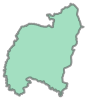

In [24]:
shapely_shape = shape(feature['geometry'])
print(type(shapely_shape))

shapely_shape

ตอนนี้ shapefile ของจังหวัดอำนาจเจริญจากฟอร์แมท ESRI ถูกแปลงมาอยู่ในรูปแบบ shapely geometry แล้ว ซึ่งจะสามารถใช้ฟังก์ชันใน shapely ได้ อย่างไรก็ตามเครื่องมือ geopandas สามารถจัดการข้อมูล GIS ได้ดีกว่าในแง่การจัดการฐานข้อมูล ส่วนการทำ geometric operations ก็ทำได้เช่นเดียวกับ shapely

## อ่าน shapefile ด้วยเครื่องมือที่ทรงพลัง geopandas

Geopandas สร้างขึ้นมาเพื่อให้สามารถจัดการข้อมูล geospatial data ในภาษาไพธอนได้ง่ายขึ้น ด้วยการรวมความสามารถของ pandas กับ shapely ทำให้สามารถที่ทำ geospatial operation ใน pandas ได้ และยังมีความสามารถทำจัดการ geometries ดังที่ shapely ทำได้อีกด้วย นอกจากนั้นหากยังสามารถเชื่อมต่อกับ spatial database เช่น PostGIS ได้อีกด้วย

From the docs:

GeoPandas implements two main data structures, a GeoSeries and a GeoDataFrame. These are subclasses of pandas Series and DataFrame, respectively.

A GeoSeries is essentially a vector where each entry in the vector is a set of shapes corresponding to one observation.

A GeoDataFrame is a tabular data structure that contains a GeoSeries.

The most important property of a GeoDataFrame is that it always has one GeoSeries column that holds a special status. This GeoSeries is referred to as the GeoDataFrame‘s “geometry”. When a spatial method is applied to a GeoDataFrame (or a spatial attribute like area is called), this commands will always act on the “geometry” column

จากข้อความด้านบน จะเห็นว่า GeoPandas ประกอบด้วยสองส่วนที่เป็นโครงสร้างข้อมูลคือ 
* GeoSeries ที่เป็นข้อมูลเวกเตอร์ เป็น subclasses ของ  pandas Series
* GeoDataFrame  ที่เป็นโครงสร้างข้อมูลตารางที่สัมพันธ์กับ GeoSeries  ที่เป็น subclasses ของ DataFrame

นิสิตควรลองไปเล่น Geopandas เพื่อให้เกิดความชำนาญ https://geopandas.org/en/stable/docs/user_guide.html


### มาลองทำความคุ้นเคยกับ GeoPandas

In [25]:
# สร้างรูปปิด
import geopandas as gpd

p1 = Polygon([(0, 0), (1, 0), (1, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
g = gpd.GeoSeries([p1, p2, p3]) # ตรงนี้ใช้ GeoSeries
print(type(g))
g

<class 'geopandas.geoseries.GeoSeries'>


0    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
2    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
dtype: geometry

ต่อไปลองมาดู GeoDataFrame  ด้วยการเปิดข้อมูล shapefile ประเทศไทยขึ้นมา

In [26]:
# อ่านข้อมูล shapefile ประเทศไทยเข้ามาอีกครั้ง เพื่อดูค่า attributes กับ map
th_bnd= gpd.read_file('./1data/shapefile/THA_adm1.shp')
print(type(th_bnd))
th_bnd.head() # แสดงแค่ 5 แถวแรก

<class 'geopandas.geodataframe.GeoDataFrame'>


,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,AreaSqKm,AreaPerct,geometry
0,228,THA,Thailand,1,Amnat Charoen,Changwat,Province,จังหวัดอำนาจเจริ,None,3242.525,0.631,"POLYGON ((104.97262 16.27536, 104.97290 16.275..."
1,228,THA,Thailand,2,Ang Thong,Changwat,Province,จังหวัดอ่างทอง,None,950.776,0.185,"POLYGON ((100.34077 14.78768, 100.34173 14.785..."
2,228,THA,Thailand,3,Bangkok Metropolis,Changwat,Province,จังหวัดเชียงใหม่,Bangkok|Krung Thep|Krung Thep Maha Nakhon|Phra...,1564.576,0.304,"POLYGON ((100.62670 13.94395, 100.62648 13.941..."
3,228,THA,Thailand,4,Bueng Kan,Changwat,Province,บึงกาฬ,None,3997.113,0.778,"POLYGON ((103.41059 18.44627, 103.41159 18.446..."
4,228,THA,Thailand,5,Buri Ram,Changwat,Province,จังหวัดบุรีรัมย์,Buri Rum,10072.286,1.959,"POLYGON ((102.93896 15.78453, 102.93933 15.784..."


พลอตข้อมูลแผนที่จาก GeoDataFrame

<AxesSubplot:>

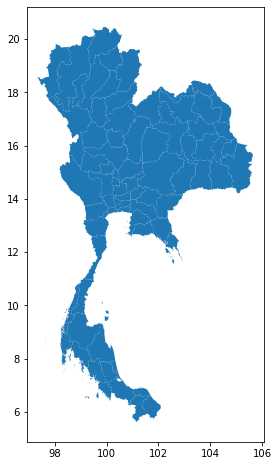

In [27]:
# พลอตแผนที่อย่างง่าย
fig, ax = plt.subplots(figsize=(8,8))
th_bnd.plot(ax=ax)

เราลองมาใช้ GeoDataFrame เพื่อทำ Geometric Manipulations บางอย่างกันดู  https://geopandas.org/en/stable/docs/user_guide/geometric_manipulations.html อันแรกเรามาใช้ convex hull https://en.wikipedia.org/wiki/Convex_hull

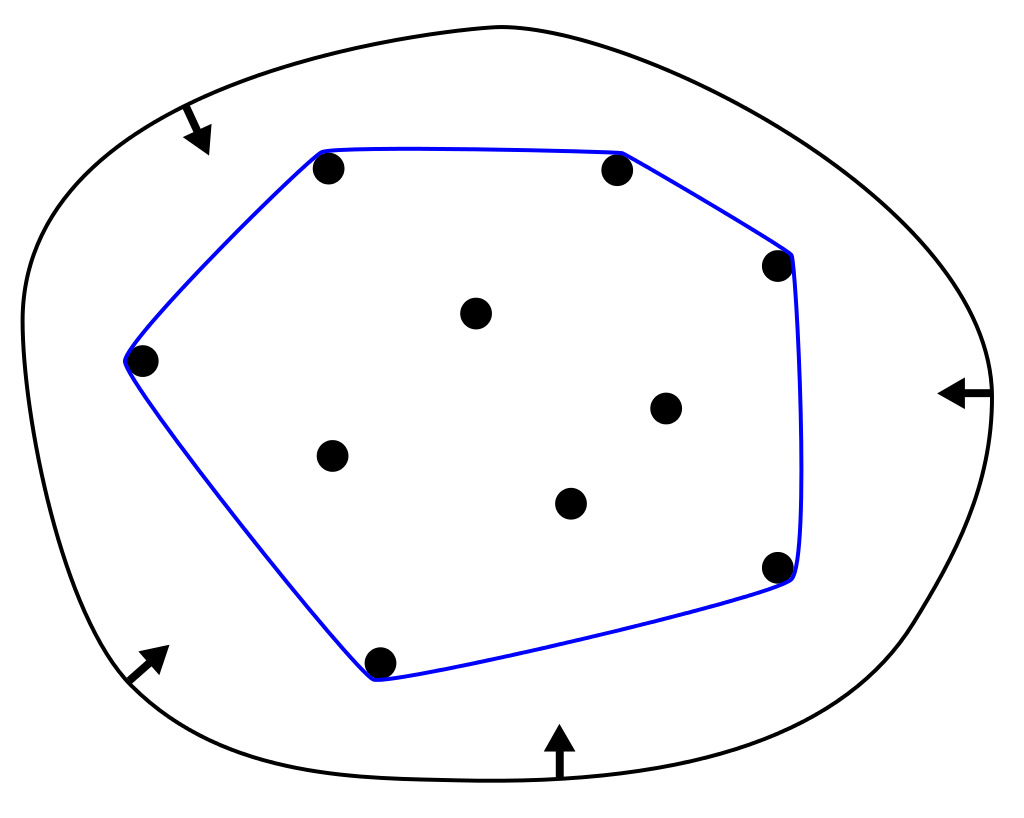

<AxesSubplot:>

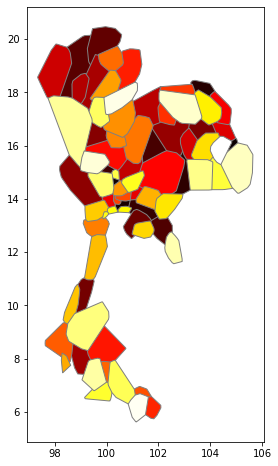

In [28]:
# พลอต convex hull 
fig, ax = plt.subplots(figsize=(8,8))
th_bnd.geometry.convex_hull.plot(ax=ax, cmap='hot', edgecolor='gray')

<AxesSubplot:>

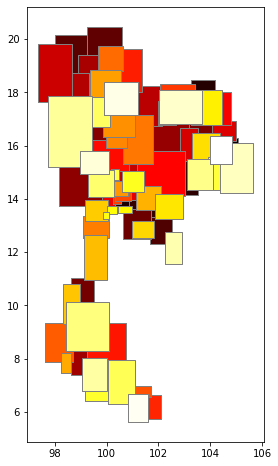

In [29]:
# พลอต GeoSeries.envelope
fig, ax = plt.subplots(figsize=(8,8))
th_bnd.geometry.envelope.plot(ax=ax, cmap='hot', edgecolor='gray')

C:\Users\Admin\AppData\Local\Temp\ipykernel_19340\450154329.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  th_bnd.geometry.centroid.plot(ax=ax, cmap='hot', edgecolor='gray')


<AxesSubplot:>

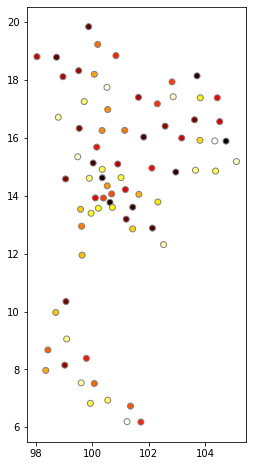

In [30]:
# พลอต GeoSeries.centroid
fig, ax = plt.subplots(figsize=(8,8))
th_bnd.geometry.centroid.plot(ax=ax, cmap='hot', edgecolor='gray')

### เล่น geopandas กับข้อมูลที่ติดตั้งมาพร้อมกับไลบราลี่ 
ข้อมูลอยู่ในโฟลเดอร์นี้ เป็น shapefile C:\Users\Admin\anaconda3\envs\pyrsIntro\Lib\site-packages\geopandas\datasets

ที่นี้จะเล่นข้อมูลโลกที่มาพร้อมกับประชากรของแต่ละประเทศ

In [31]:
#อ่านข้อมูลประเทศเข้ามา
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

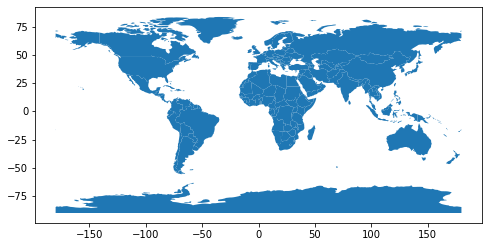

In [32]:
# พลอตแผนที่โลก
fig, ax = plt.subplots(figsize=(8,8)) 
world.plot(ax=ax)

สามารถใช้ geopandas ในการกรองข้อมูลที่ต้องการเหมือนกับที่ใช้ pandas dataframe นิสิตสามารถเรียนรู้เพิ่มเติม ด้วยการเรียน pandas จากอาจารย์ประเสริฐ ลิงก์นี้ครับ https://www.youtube.com/watch?v=W661Zy939Q0&list=PLoTScYm9O0GFVfRk_MmZt0vQXNIi36LUz&index=20

In [33]:
# ค้นหาประเทศที่มีประชากรมากกว่า 150 คน
world[(world.pop_est > 150000000)]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."
56,190632261,Africa,Nigeria,NGA,1089000.0,"POLYGON ((2.69170 6.25882, 2.74906 7.87073, 2...."
98,1281935911,Asia,India,IND,8721000.0,"POLYGON ((97.32711 28.26158, 97.40256 27.88254..."
99,157826578,Asia,Bangladesh,BGD,628400.0,"POLYGON ((92.67272 22.04124, 92.65226 21.32405..."
102,204924861,Asia,Pakistan,PAK,988200.0,"POLYGON ((77.83745 35.49401, 76.87172 34.65354..."
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."


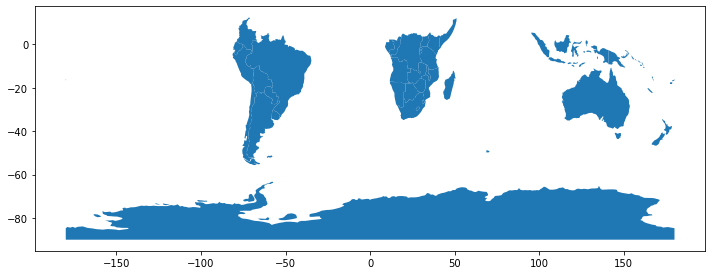

In [34]:
# กรองเชิงพื้นที่ก็ทำได้ ด้วยตัวอย่างการหาประเทศที่อยู่ในซีกโลกใต้ 
southern_world = world.cx[:, :0]

fig, ax = plt.subplots(figsize=(12,5)) 
southern_world.plot(ax=ax);

ต่อไป สามารถกรองเอาแต่คอลัมน์ที่สนใจ พร้อมกับการหาผลรวมประชากรตามทวีปได้

In [35]:
world_filtered = world[['continent', 'geometry', 'pop_est']] # กรองคอลัมน์ที่สนใจ
continents = world_filtered.dissolve(by='continent', aggfunc='sum') # รวมประชากรตามทวีป
continents

,geometry,pop_est
continent,,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",1219176238
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",4050
Asia,"MULTIPOLYGON (((48.67923 14.00320, 48.23895 13...",4389144868
Europe,"MULTIPOLYGON (((-53.55484 2.33490, -53.77852 2...",746398461
North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421...",573042112
Oceania,"MULTIPOLYGON (((147.91405 -43.21152, 147.56456...",36782844
Seven seas (open ocean),"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",140
South America,"MULTIPOLYGON (((-68.63999 -55.58002, -69.23210...",418540749


สามารถสร้างแผนที่ chloropleth หรือแผนที่แสดงค่าเชิงปริมาณด้วยสี ตามสัดส่วนของปริมาณในคอลัมน์ที่สนใจ ในที่นี้จะทำการสร้างแผนที่ตามสัดส่วน GDP ของแต่ละประเทศ

C:\Users\Admin\anaconda3\envs\pyrsIntro\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<AxesSubplot:>

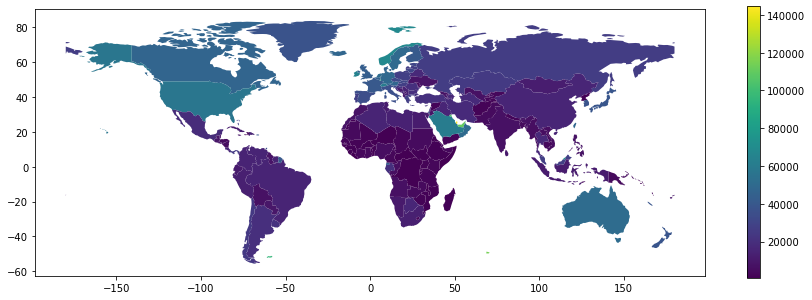

In [36]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world['gdp_per_cap'] = world['gdp_per_cap'] * 1000000 # because it was calcualted in millionths

fig, ax = plt.subplots(figsize=(15,5))
world.plot(column='gdp_per_cap', legend=True, ax=ax) # เพิ่ม colorbar

ต่อไป ลองมาพลอตข้อมูลน้ำทะเลและธารน้ำแข็งกันบ้าง

<AxesSubplot:>

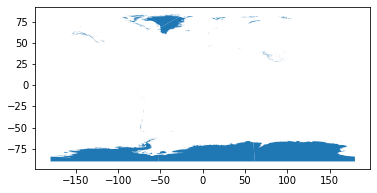

In [37]:
# ข้อมูลนำมาจาก http://www.naturalearthdata.com/downloads/
# ธารน้ำแข็ง
glaciers = gpd.read_file("./1data/shapefile/ne_10m_glaciated_areas.shp")
glaciers.plot()

<AxesSubplot:>

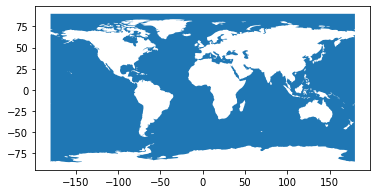

In [38]:
#ข้อมูลมหาสมุทร http://www.naturalearthdata.com/downloads/
oceans = gpd.read_file("./1data/shapefile/ne_110m_ocean.shp")
oceans.plot()

พลอตแผนที่โดยซ้ายทับกันมหาสมุทร ประเทศและธารน้ำแข็ง

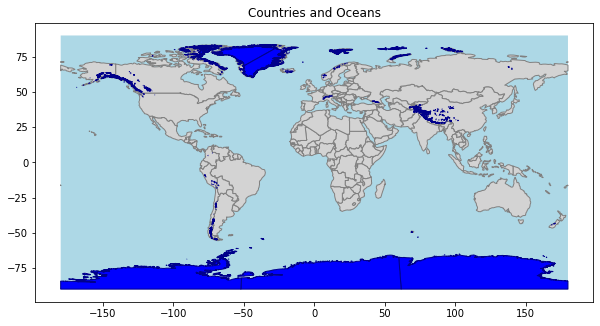

In [39]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.set_title('Countries and Oceans')
oceans.plot(ax=ax, facecolor='lightblue')
world.plot(ax=ax, facecolor='lightgray', edgecolor='gray')
glaciers.plot(ax=ax, facecolor='blue', edgecolor='darkblue')
ax.set_aspect('equal')

แผนที่ของธารน้ำแข็ง กับ ข้อมูลแผ่นดิน มีมาตราส่วนที่ต่างกัน ยกตัวอย่างในรัฐอลาสก้า จะทำการขยายให้ดูต่อไป 

(-155.0, -145.0)

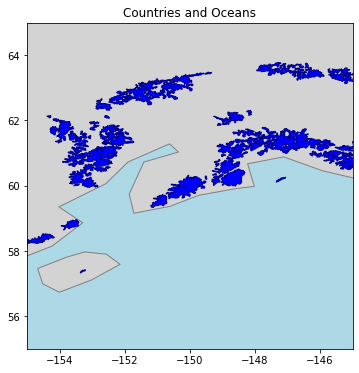

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Countries and Oceans')
oceans.plot(ax=ax, facecolor='lightblue')
world.plot(ax=ax, facecolor='lightgray', edgecolor='gray')
glaciers.plot(ax=ax, facecolor='blue', edgecolor='darkblue')

# specify a location by lat and long
ax.set_ylim([55, 65])
ax.set_xlim([-155, -145])

## สาธิตการอ่านข้อมูลจาก OGC WFS GeoJSON เข้ามาใน GeoDataFrame

* ใช้ OGC WFS เพื่อดึงข้อมูลเชิงพื้นที่มาจากอินเตอร์เนต ด้วยการ request ฟีเจอร์จากชั้นข้อมูลที่ชื่อ  “oa:goainv” ที่พบใน GeoServer instance จาก NANOOS โดยให้ส่งมาในรูปแบบ GeoJSON ฟอร์แมท 
* แล้วจึงใช้ geojson package เพื่อทำการโหลด response (a GeoJSON string) ให้ไปเก็บไว้ในรูปของ  geojson feature object ที่เป็นโครงสร้างแบบดิกชันนารี คือ มี keys กับ values
* ชั้นข้อมูล “oa:goainv” เป็นชุดข้อมูลของตำแหน่งตรวจความเป็นกรดของมหาสมุทร ที่เรือได้เดินทางไปเก็บตามตำแหน่งต่างๆ โดยกำลังทำงานวิจัยเหล่านี้อยู่โดย Global Ocean Acidification Observation Network (GOA-ON)

In [41]:
import requests
import geojson

# ตั้งค่าพารามิเตอร์เพื่อใช้ดึงข้อมูล
wfs_url = "http://data.nanoos.org/geoserver/ows"
params = dict(service='WFS', version='1.0.0', request='GetFeature',
              typeName='oa:goaoninv', outputFormat='json')

# ส่ง request เพื่อร้องขอข้อมูล
r = requests.get(wfs_url, params=params)
wfs_geo = geojson.loads(r.content)

ตรวจสอบชนิดข้อมูล GeoJSON

In [42]:
# ตรวจสอบ
print(type(wfs_geo))
print(wfs_geo.keys())
print(len(wfs_geo.__geo_interface__['features']))

<class 'geojson.feature.FeatureCollection'>
dict_keys(['type', 'totalFeatures', 'crs', 'features'])
742


ใช้ from_features constructor เพื่อสร้าง GeoDataFrame จาก geojson.feature.FeatureCollection object

In [43]:
wfs_gdf = gpd.GeoDataFrame.from_features(wfs_geo)

พลอตแผนที่ตำแหน่งเรือในการเก็บข้อมูล

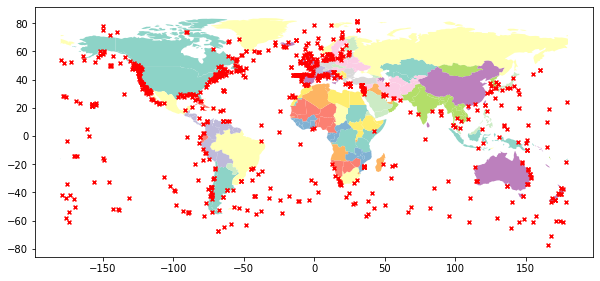

In [44]:
wfs_gdf.plot(ax=world.plot(cmap='Set3', figsize=(10, 6)),
             marker='x', markersize=15,  color='red');

ตรวจดูข้อมูล ว่าประกอบไปด้วยข้อมูลอะไรบ้าง

In [45]:
wfs_gdf.iloc[0]

geometry                                           POINT (35.103906 33.063656)
id                                                                           2
update_date                                                          2019/4/22
SDG                                                                        YES
data_quality                                                           climate
sampling_type                                                         repeated
overlaps_with                                                                 
comments_about_overlaps                                                       
source_doc                                                     FixedTimeSeries
platform_type                                                             FOTS
platform_name                                                               AK
type                                        IOLR Coastal Beach Rock Monitoring
organization                 National Institute of O

จากตัวอย่างนี้ นิสิตน่าจะเกิดไอเดียของการดึงข้อมูลที่ให้บริการผ่านอินเตอร์เน็ต เช่น กรมอุตุนิยมวิทยาแห่งประเทศไทย ที่ให้บริการข้อมูลสภาพอากาศในรูปแบบ API ที่นิสิตสามารถดึงมาในรูปของ GeoJSON แล้วเก็บข้อมูลไว้ใน GeoDataFrame เพื่อประมวลผลต่อไปได้